reuse rate measured

swiss 0.1

ESRB 1

australia 0.6

# testing 

At initialization, asset and liabilites are equal 
$$\alpha D + \beta D + L  = \frac{1}{1-\gamma} D$$
$$\alpha + \beta \leq \frac{1}{1-\gamma}$$

In [1]:
from dynamics import ClassDynamics
from network import ClassNetwork


# parameter setting
nb_banks=50
path_results="./results/single_run/test/"
initial_deposits_size = 40

# reg ratios
alpha_init=0.01  # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.5 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.5
beta_star=0.5
gamma=0.03
gamma_init = 3*gamma
collateral_value=1.0

# initialisation of deposits size
initialization_method="pareto"
alpha_pareto=1.3

# shocks on deposits 
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.01 # 0.05

# min trans size
min_repo_trans_size=1e-8  # 1e-8

# dynamics & ploting
nb_steps=int(5e3)
dump_period=int(5e2)
plot_period=int(5e2)
cp_option=True
heavy_plot=False

# LCR mgt
LCR_mgt_opt=True

# leverage mgt
end_repo_period=False # if int, periodic end repo / if false, leverage mgt
gamma_star = 3*gamma

# money creation
loan_tenor=5000 # if int, money creation / if false. no new loans
loan_period=1
new_loans_vol = 0 # standard deviation around the mean creation of loans
new_loans_mean = 5e-2/250 # daily mean increase in loans expressed as a percentage of the intital loans (the other option would be a relative increase but it is unstable np.exp(np.log(1.01)/250)-1 = 4e-5)
beta_new = beta_reg # if number, new colat / if false, no new colat 
# gamma_new = gamma_star*(beta_reg+1)/(1+gamma_star*beta_reg) # if number, new own funds / if false, no new own funds. we need to also add beta reg to ensure LCR can be covered with additional cash (and we still match the solvency ratio despite this excess of stress) in the case of no payment shocks and no collateral creation
gamma_new = gamma_star


# initialize ClassNetwork
Network = ClassNetwork(
    nb_banks=nb_banks,
    initial_deposits_size=initial_deposits_size,
    alpha_init=alpha_init,
    alpha=alpha,
    beta_init=beta_init,
    beta_reg=beta_reg,
    beta_star=beta_star,
    beta_new=beta_new,
    gamma_init=gamma_init,
    gamma=gamma,
    gamma_star=gamma_star,
    gamma_new=gamma_new,
    collateral_value=collateral_value,
    initialization_method=initialization_method,
    alpha_pareto=alpha_pareto,
    shocks_method=shocks_method,
    shocks_law=shocks_law,
    shocks_vol=shocks_vol,
    LCR_mgt_opt=LCR_mgt_opt,
    min_repo_trans_size=min_repo_trans_size,
    loan_tenor=loan_tenor,
    loan_period=loan_period,
    new_loans_vol=new_loans_vol,
    new_loans_mean=new_loans_mean,
    end_repo_period=end_repo_period,
)

# initialize ClassDynamics
Dynamics = ClassDynamics(
    Network,
    nb_steps=nb_steps,
    path_results=path_results,
    dump_period=dump_period,
    plot_period=plot_period,
    cp_option=cp_option,
    heavy_plot=heavy_plot,
)

# simulate
Dynamics.simulate()

simulate the repo market


  0%|          | 3/4999 [00:00<08:59,  9.26it/s]

In [5]:
import numpy as np
np.exp(np.log(1.01)/250)-1

3.980211549592383e-05

# ploting

In [3]:
# get graphics after interupting 
import graphics  as gx
Dynamics.nb_steps = Network.step
Dynamics.plot_period = Network.step
Dynamics.fill()
Dynamics.dump()
gx.plot(Dynamics)

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 580928.53it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 735842.81it/s]


get arr_rev_repo_exp_adj


58736it [00:07, 7801.67it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 3087/3087 [00:03<00:00, 841.98it/s] 


get jaccard


100%|██████████| 3086/3086 [00:00<00:00, 4989.66it/s]


get density


100%|██████████| 3086/3086 [00:00<00:00, 5102.64it/s]


get degree stats


100%|██████████| 3086/3086 [00:01<00:00, 1721.31it/s]


get exposure stats


100%|██████████| 3088/3088 [00:00<00:00, 5410.68it/s]


run core-periphery tests


  0%|          | 0/5 [00:00<?, ?it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2813.99it/s]


test on day 3087


 20%|██        | 1/5 [00:00<00:00,  6.98it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2895.66it/s]


test on day 3087


 40%|████      | 2/5 [00:00<00:00,  7.66it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2939.18it/s]


test on day 3087


 60%|██████    | 3/5 [00:00<00:00,  7.81it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2890.59it/s]


test on day 3087


 80%|████████  | 4/5 [00:00<00:00,  7.82it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 1666.24it/s]


test on day 3087


100%|██████████| 5/5 [00:00<00:00,  7.58it/s]


get transaction stats av. network


100%|██████████| 3087/3087 [00:18<00:00, 169.81it/s]


get transaction stats av. bank


100%|██████████| 3087/3087 [00:03<00:00, 944.97it/s]


# analysis

In [3]:
import numpy as np 
for chain in Network.chains_rev_repo:
   if  len(np.unique (np.array(chain))) < len(np.array(chain)):
      print("error")

In [6]:
max = 0 
min = 19
sum = 0
for chain in Network.chains_rev_repo:
   if  len(chain) > max:
      max = len(chain)
   if  len(chain) < min:
      min = len(chain)
   sum +=len(chain)

print(max)
print(min)
print(sum/len(Network.chains_rev_repo))

18
2
9.411325805448131


# new loans

(array([36.,  7.,  3.,  0.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([0.22896693, 0.83264029, 1.43631366, 2.03998702, 2.64366039,
        3.24733375, 3.85100712, 4.45468048, 5.05835385, 5.66202721,
        6.26570058]),
 <BarContainer object of 10 artists>)

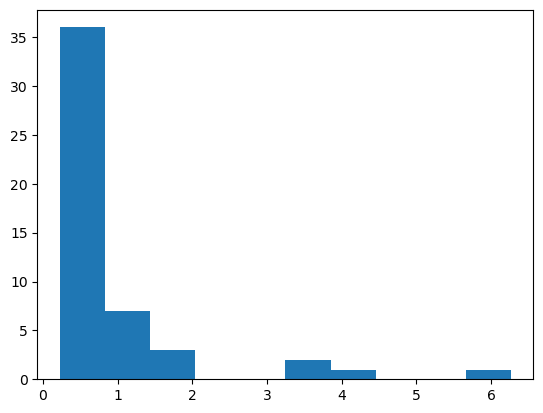

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
ar_new_loans = (np.random.randn(nb_banks) * new_loans_vol + 1)*new_loans_mean
plt.hist(ar_new_loans*Network.df_banks["initial loans"])

# Assessement of stationarity

In [107]:
import pandas as pd
import scipy as sc
import numpy as np 
from matplotlib import pyplot as plt

df_network_trajectory = pd.read_csv("./results/single_run/convergence of the ratio borrowing ov deposits - not convincing 0.3/df_network_trajectory.csv", index_col=0)

In [108]:
def f_fit(x,a,b,tau):
    return a-b*np.exp(-x/tau)

def g_fit(x,a,b,tau=1):
    return a-b/(x*1.0)**(tau**2)

In [109]:
fit = sc.optimize.curve_fit(g_fit, df_network_trajectory.index[500:], df_network_trajectory["borrowings ov. deposits tot. network"].iloc[500:], p0=[50.0,50.0,0.5], full_output=True)

In [111]:
popt = fit[0]
popt

array([ 53.64488461, 224.98317121,   0.52191254])

(0.0, 50.0)

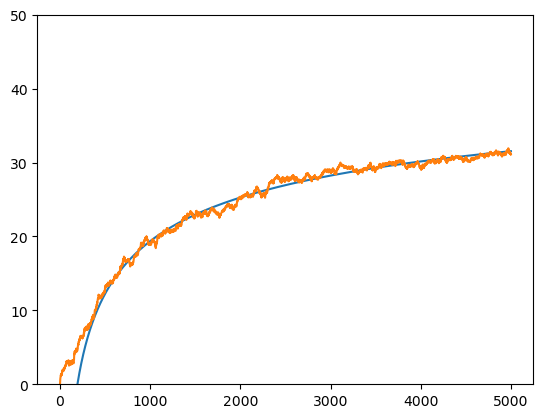

In [112]:
plt.plot(df_network_trajectory.index, g_fit(df_network_trajectory.index, *popt))
plt.plot(df_network_trajectory.index, df_network_trajectory["borrowings ov. deposits tot. network"])
plt.ylim(0,50)

In [118]:
def R2(y,ymodeled):
    return 1 - ((y-ymodeled)**2).sum() / (y**2).sum()

R2(df_network_trajectory["borrowings ov. deposits tot. network"].iloc[500:],g_fit(df_network_trajectory.index[500:], *popt))*100

99.95991316892501

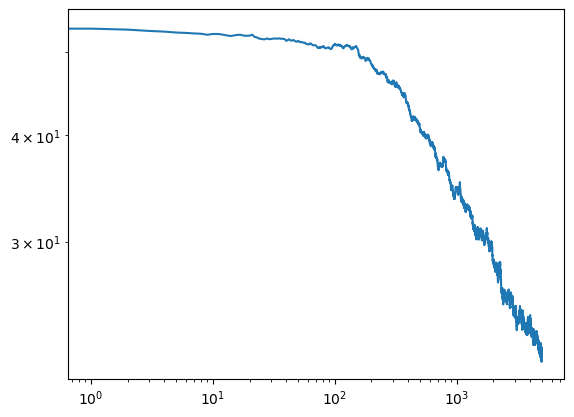

In [119]:
# 50.881

sr_test = 53.64 - df_network_trajectory["borrowings ov. deposits tot. network"]
sr_test.plot()
plt.yscale("log")
plt.xscale("log")